In [1]:
pip install tweepy textblob matplotlib pandas seaborn


Import Libraries


In [4]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data=[{"timestamp":"2025-03-01","text":" i lovebthsi product!"},
{"timestamp":"2025-03-02","text":"this is the worst services i have ever received."},
{"timestamp":"2025-03-03","text":"its an okay experience ,not great ,but not bad either"},
{"timestamp":"2025-03-04","text":"i an so happy with this purchase!"},
{"timestamp":"2025-03-05","text":"i regret buying this ,it was a waste of money."},
{"timestamp":"2025-03-06","text":"the food is amazing .i will come again."},]


In [84]:
sentiments=[]
for entry in data:
  analysis=TextBlob(entry['text'])
  polarity=analysis.sentiment.polarity
  sentiments.append(polarity)


In [85]:
# Twitter API credentials
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

# Authenticate using OAuth
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

In [79]:
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'
        print(positive,negative,neutral)

In [64]:
def fetch_tweets(query,count=100):
  tweets=tweepy.Cursor(api.search,q=quary,lang="en",tweet_mode="extended").items(count)
  tweets_data=[]
  for tweet in tweets:
    tweet_data.append({'tweet':tweet.full_text,'created_at':tweet.created_at})
  return pd.DataFrame(tweet_data)

Preprocess Text

In [16]:
import re
def preprocess_text(text):
  text=re.sub(r'http\S+','',text) #remove URLS
  text=re.sub(r'@[A-Za-z0-9]+','',text) #remove mentions
  text=re.sub(r'[^A-Za-z\s]+','',text) #remove special character
  text=text.lower() #convert to lowercase
  return text

In [17]:
#sentiments analysis
def get_sentiments(text):
  analysis=TextBolb(text)
  return analysis.sentiments.polarity

In [72]:
#sentiments score calculation
def analysis_sentiment(text):
  tweets_df['cleaned_tweet']=tweets_df['tweet'].apply(preprocess_text)
  tweets_df['sentiment']=tweets_df['cleaned_tweet'].apply(get_sentiment)
  return tweets_df


Visualize Sentiment trends Over Time

In [48]:
def plot_sentiment_trends(tweets_df):
  tweets_df['data']=pd.to_datetime(tweets_df['created_at']).dt.date
  sentiment_trend=tweets_df.groupby('date')['sentiment'].mean()


In [88]:
df=pd.DataFrame(data)
df['sentiment']=sentiments
df


,timestamp,text,sentiment
0,2025-03-01,i lovebthsi product!,0.00
1,2025-03-02,this is the worst services i have ever received.,-1.00
2,2025-03-03,"its an okay experience ,not great ,but not bad...",0.15
3,2025-03-04,i an so happy with this purchase!,1.00
4,2025-03-05,"i regret buying this ,it was a waste of money.",-0.20
5,2025-03-06,the food is amazing .i will come again.,0.60


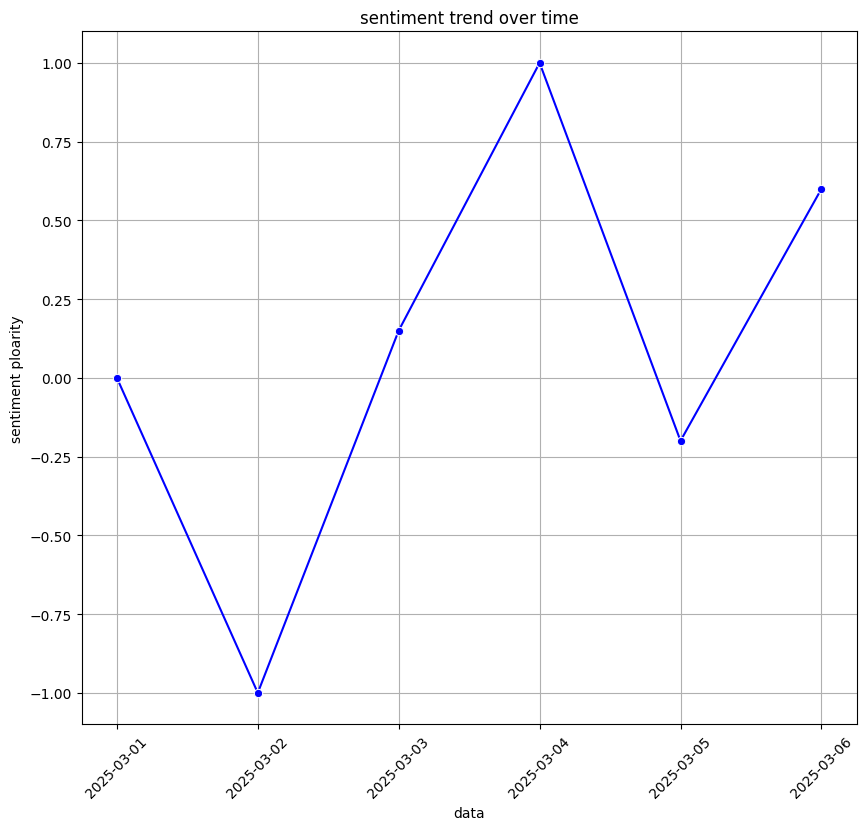

In [91]:
#plot sentiment trend over time
plt.figure(figsize=(10,9))
sns.lineplot(x='timestamp',y='sentiment',data=df,marker='o',color='b')
plt.title('sentiment trend over time')
plt.xlabel('data')
plt.ylabel('sentiment ploarity')
plt.grid(True)
plt.xticks(rotation=45)
plt.show();

 Sentiment by Hour (Hourly Sentiment Trend)

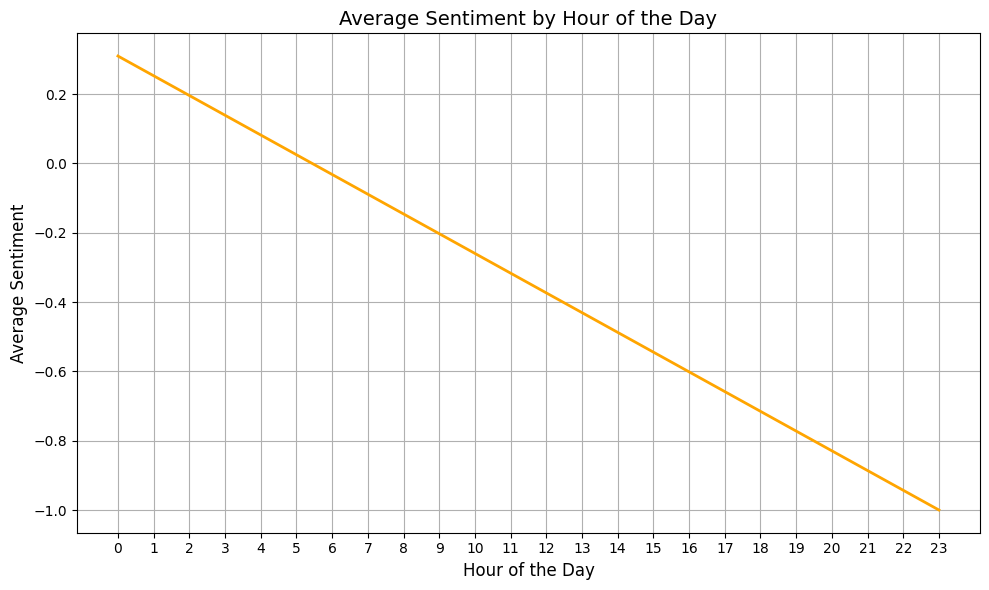

In [97]:
# Extract hour from tweet creation time
df['hour'] = pd.to_datetime(df['sentiment']).dt.hour

# Calculate the average sentiment for each hour of the day
hourly_sentiment = df.groupby('hour')['sentiment'].mean()

# Plot hourly sentiment trends
plt.figure(figsize=(10, 6))
hourly_sentiment.plot(kind='line', color='orange', linewidth=2)
plt.title('Average Sentiment by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


Sentiment Score Distribution (Histogram)

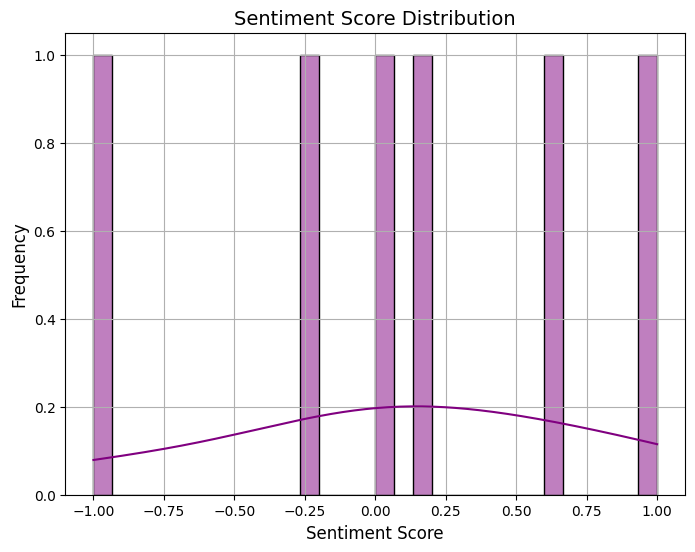

In [98]:
# Plot the sentiment score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='purple')
plt.title('Sentiment Score Distribution', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-99-de4f30d1a96b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


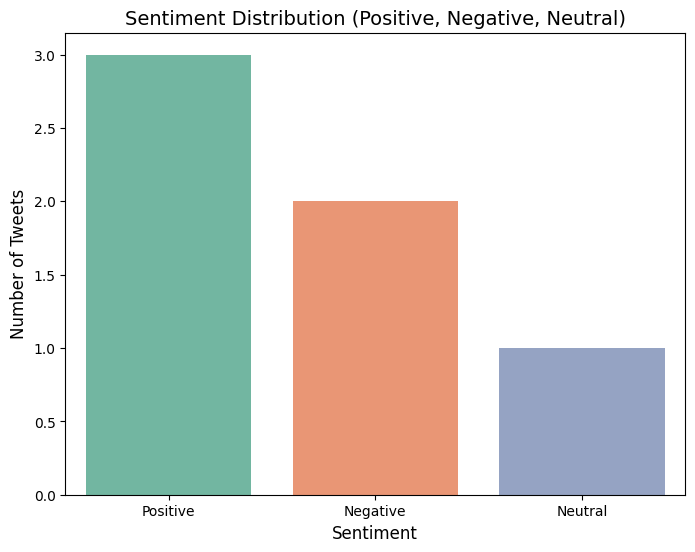

In [99]:


# Assume tweets_df is the DataFrame containing tweets and their sentiment scores
df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

# Count the distribution of sentiments
sentiment_counts = df['sentiment_label'].value_counts()

# Plot the sentiment distribution as a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Sentiment Distribution (Positive, Negative, Neutral)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.show()


Sentiment Trend Over Time (Line Plot)

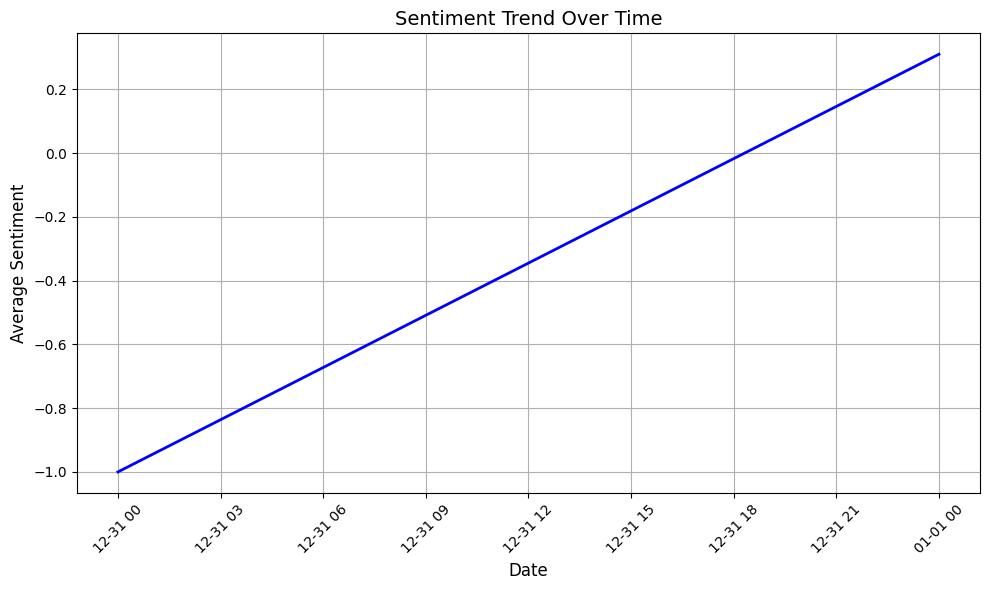

In [101]:
import matplotlib.pyplot as plt

# Assuming tweets_df has 'created_at' (timestamp) and 'sentiment' columns
df['date'] = pd.to_datetime(df['sentiment']).dt.date

# Calculate the average sentiment per day
daily_sentiment = df.groupby('date')['sentiment'].mean()

# Plot sentiment trends over time
plt.figure(figsize=(10, 6))
daily_sentiment.plot(kind='line', color='blue', linewidth=2)
plt.title('Sentiment Trend Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sentiment Pie Chart

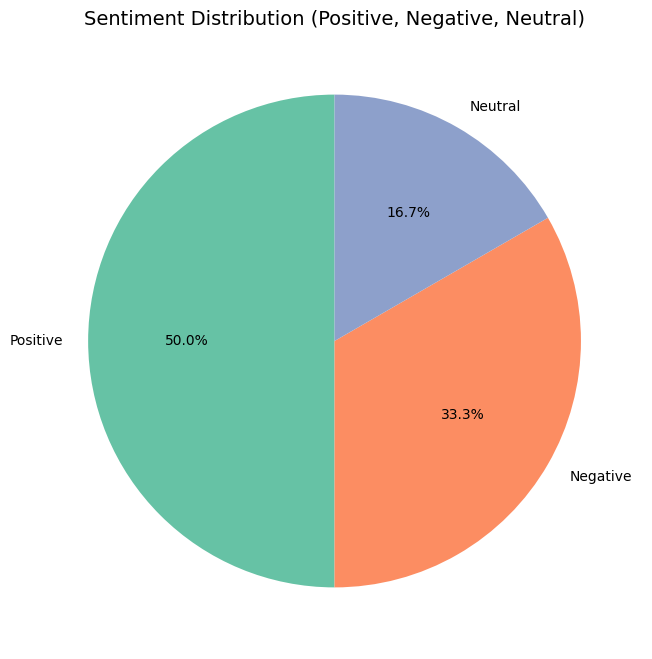

In [102]:
# Count the distribution of sentiments
sentiment_counts = df['sentiment_label'].value_counts()

# Plot sentiment distribution as a pie chart
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(sentiment_counts)), startangle=90)
plt.title('Sentiment Distribution (Positive, Negative, Neutral)', fontsize=14)
plt.ylabel('')  # Remove ylabel for better appearance
plt.show()


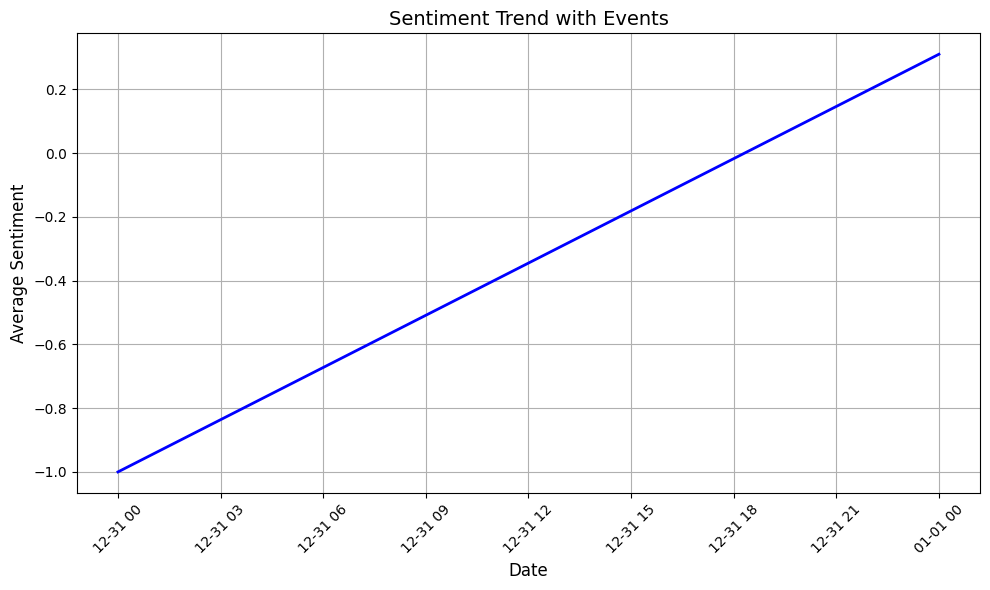

In [116]:
# Plot sentiment trend over time with event annotations
plt.figure(figsize=(10, 6))
daily_sentiment.plot(kind='line', color='blue', linewidth=2)

# Annotate some significant points (example: positive or negative spikes)
plt.annotate('Product Launch', xy=('2025-03-10', 0.4), xytext=('2025-03-05', 0.6),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=12, color='black')

plt.annotate('Controversial Event', xy=('2025-03-20', -0.5), xytext=('2025-03-15', -0.7),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='black')

plt.title('Sentiment Trend with Events', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
